### Import

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [52]:
df_ara = pd.read_csv('Data/ARA/listings.csv')
df_idf = pd.read_csv('Data/IDF/listings.csv')
df_naq = pd.read_csv('Data/NAQ/listings.csv')
df_bordeaux = pd.read_csv('Data/64/listings.csv')

df = pd.concat([df_ara, df_idf, df_naq, df_bordeaux], ignore_index=True)

# df = pd.read_csv('Data/listings_all_cols.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,831713,https://www.airbnb.com/rooms/831713,20240913025629,2024-09-13,city scrape,645 sq ft (60m²) apartment downtown lyon 2BR...,Apartment located in Saint-Just up the hill of...,NaN,https://a0.muscache.com/pictures/12333829/0f9e...,4355017,...,4.89,4.75,4.72,6938513291736,f,1,1,0,0,0.38
1,845068,https://www.airbnb.com/rooms/845068,20240913025629,2024-09-13,previous scrape,APARTMENT INCOMPARABLE PLACE OF THE LYON,n the heart of the Lyonnaise peninsula in the ...,Everything is very exciting in this lively dis...,https://a0.muscache.com/pictures/miso/Hosting-...,3548058,...,4.63,4.88,4.63,6938212387343,f,1,1,0,0,0.06
2,877193,https://www.airbnb.com/rooms/877193,20240913025629,2024-09-13,previous scrape,Loft heart of Lyon ideal for family,NaN,"The area is lively, many shops: bakeries, butc...",https://a0.muscache.com/pictures/7c52fdbb-3959...,4634428,...,4.94,4.85,4.77,6938312653768,f,1,1,0,0,1.30
3,903331,https://www.airbnb.com/rooms/903331,20240913025629,2024-09-13,city scrape,GD STAND - BUSINESS OR HOLIDAYS- 4*,"Rated 4 stars- for business or for holidays, i...",The district of Brotteaux is very renowned for...,https://a0.muscache.com/pictures/hosting/Hosti...,4829230,...,4.79,4.62,4.47,6938613145318,f,2,2,0,0,0.27
4,903333,https://www.airbnb.com/rooms/903333,20240913025629,2024-09-13,city scrape,LYON BROTTEAUX- MEUBLE LONGUE DUREE,Very bright apartment and ideally located in t...,The district of Brotteaux is very renowned for...,https://a0.muscache.com/pictures/hosting/Hosti...,4829230,...,4.80,4.60,4.80,"Available with a mobility lease only (""bail mo...",f,2,2,0,0,0.08


In [53]:
df.shape

(130060, 75)

In [54]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.300600e+05,1.300600e+05,1.300600e+05,130052.000000,130052.000000,130060.000000,130060.000000,130060.000000,89506.000000,120094.000000,...,96966.000000,96949.000000,96962.000000,96948.000000,96946.000000,130060.000000,130060.000000,130060.000000,130060.000000,96984.000000
mean,5.481267e+17,2.024088e+13,1.740639e+08,45.666587,66.139536,47.726123,1.878686,3.392104,1.225153,1.432045,...,4.665424,4.816734,4.835802,4.800077,4.628026,19.386483,18.574296,0.746502,0.020344,1.101659
std,5.035558e+17,8.508445e+07,1.901879e+08,316.023313,536.750395,1.952659,1.586281,1.834206,0.591604,1.002187,...,0.443517,0.351743,0.339862,0.312244,0.425686,80.352309,79.389137,8.327225,0.360923,1.390594
min,3.109000e+03,2.024062e+13,2.626000e+03,0.000000,0.000000,42.995760,-1.786636,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.987862e+07,2.024091e+13,2.237745e+07,1.000000,1.000000,45.770139,2.288679,2.000000,1.000000,1.000000,...,4.510000,4.780000,4.810000,4.730000,4.500000,1.000000,1.000000,0.000000,0.000000,0.210000
50%,6.786480e+17,2.024091e+13,7.630098e+07,1.000000,2.000000,48.854461,2.340529,3.000000,1.000000,1.000000,...,4.800000,4.930000,4.950000,4.900000,4.720000,1.000000,1.000000,0.000000,0.000000,0.640000
75%,1.054244e+18,2.024091e+13,3.149949e+08,3.000000,4.000000,48.873250,2.370310,4.000000,1.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,4.900000,2.000000,2.000000,0.000000,0.000000,1.470000
max,1.244261e+18,2.024091e+13,6.511367e+08,7397.000000,9623.000000,48.901670,4.897530,16.000000,42.000000,41.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,781.000000,781.000000,171.000000,12.000000,59.120000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130060 entries, 0 to 130059
Data columns (total 75 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            130060 non-null  int64  
 1   listing_url                                   130060 non-null  object 
 2   scrape_id                                     130060 non-null  int64  
 3   last_scraped                                  130060 non-null  object 
 4   source                                        130060 non-null  object 
 5   name                                          130060 non-null  object 
 6   description                                   125047 non-null  object 
 7   neighborhood_overview                         67143 non-null   object 
 8   picture_url                                   130057 non-null  object 
 9   host_id                                       13

### Cleaning

In [56]:
df = df.T.drop_duplicates().T
df.dropna(axis=1, how='all', inplace=True)
df.drop([c for c in df.columns if df[c].nunique()==1], axis=1, inplace=True)
df.drop(df.columns[df.columns.str.contains("url")], axis=1, inplace=True)

In [57]:
df.price = df.price.str.replace(r"$", "").str.replace(",", "").astype("float32")

In [58]:
numerical_columns = df.select_dtypes(exclude=object).columns.tolist()
categorical_columns = df.select_dtypes(include=object).columns.tolist()

In [59]:
numeric_imputer = SimpleImputer(strategy='median')
df[numerical_columns] = numeric_imputer.fit_transform(df[numerical_columns])

categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

### EDA

In [60]:
df['price'].describe()

count    130060.000000
mean        202.734680
std         463.452637
min           8.000000
25%         108.000000
50%         136.000000
75%         179.000000
max       30400.000000
Name: price, dtype: float64

In [61]:
df['bedrooms'].mean()

1.3989389512532677

In [62]:
df['bathrooms'].mean()

1.1549477164385669

In [63]:
df['review_scores_rating'].mean()

4.798600030755015

In [64]:
average_annual_availability = df['availability_365'].mean()
estimated_annual_occupancy_rate = 100 - (average_annual_availability / 365 * 100)
estimated_annual_occupancy_rate


64.27470145496599

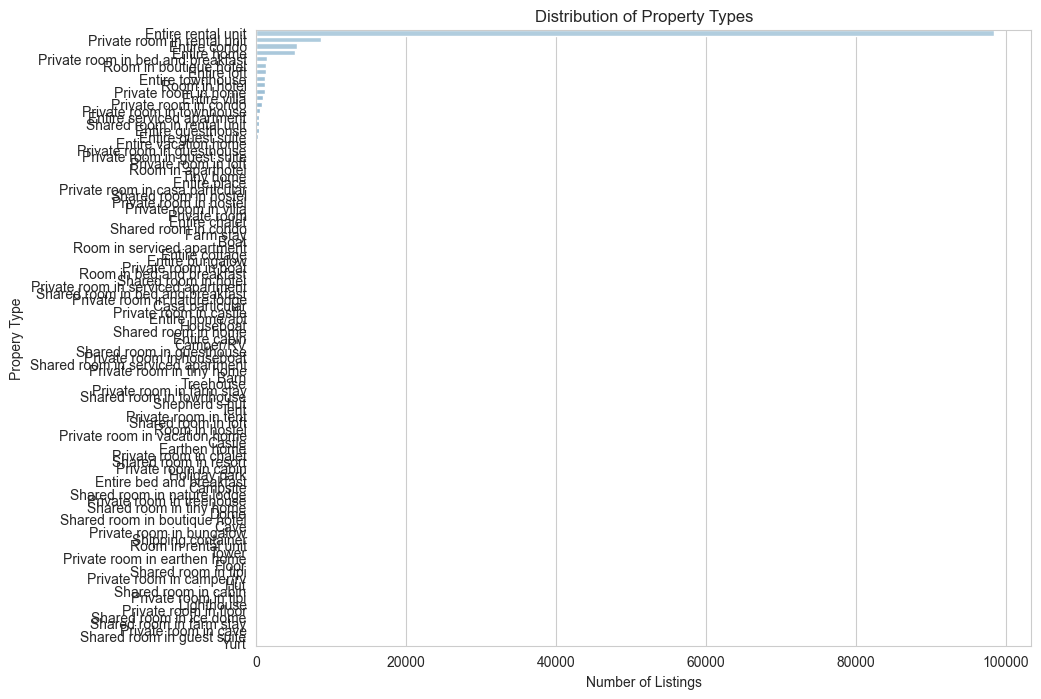

In [65]:
sns.set_style("whitegrid")

property_type_counts = df['property_type'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=property_type_counts.values, y=property_type_counts.index, palette="Blues_d")
plt.title("Distribution of Property Types")
plt.xlabel("Number of Listings")
plt.ylabel("Propery Type")
plt.show()

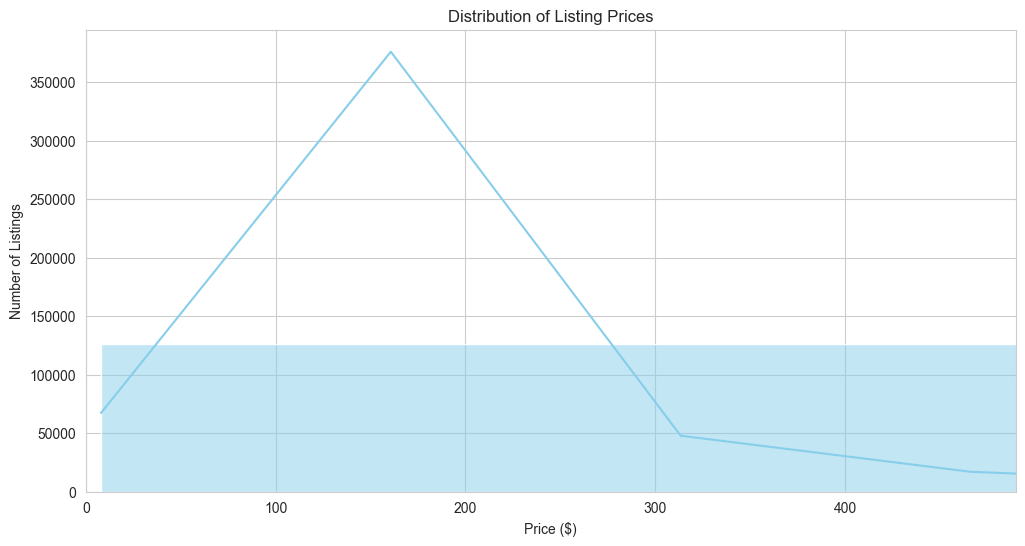

In [66]:
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=50, kde=True, color="skyblue")
plt.title('Distribution of Listing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.xlim(0, df['price'].quantile(0.95))
plt.show()

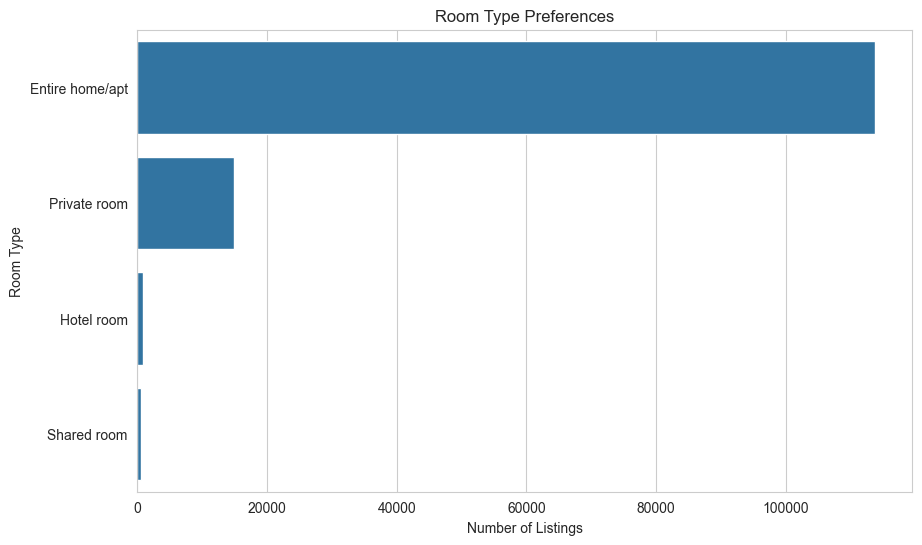

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='room_type', order=df['room_type'].value_counts().index)
plt.title('Room Type Preferences')
plt.xlabel('Number of Listings')
plt.ylabel('Room Type')
plt.show()

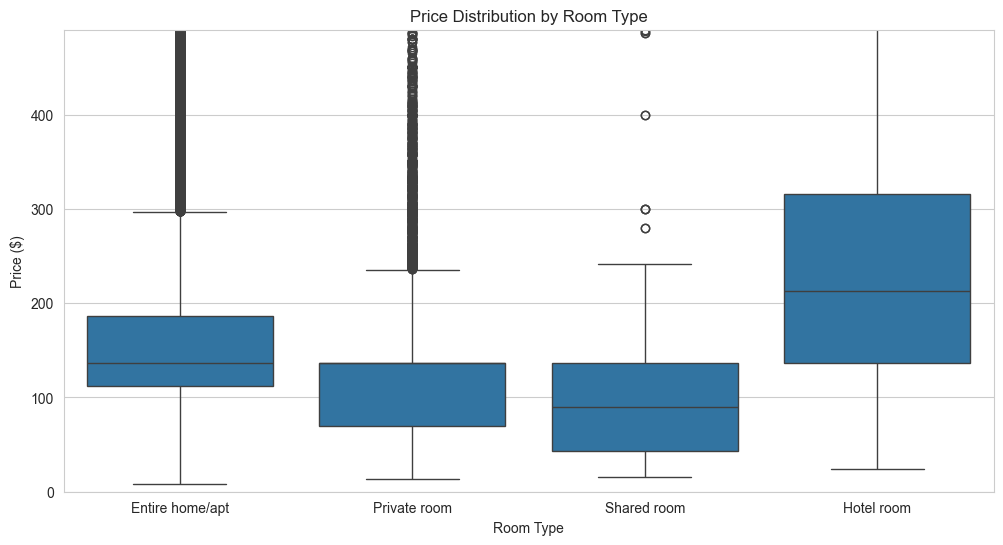

In [68]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.ylim(0, df['price'].quantile(0.95))
plt.show()

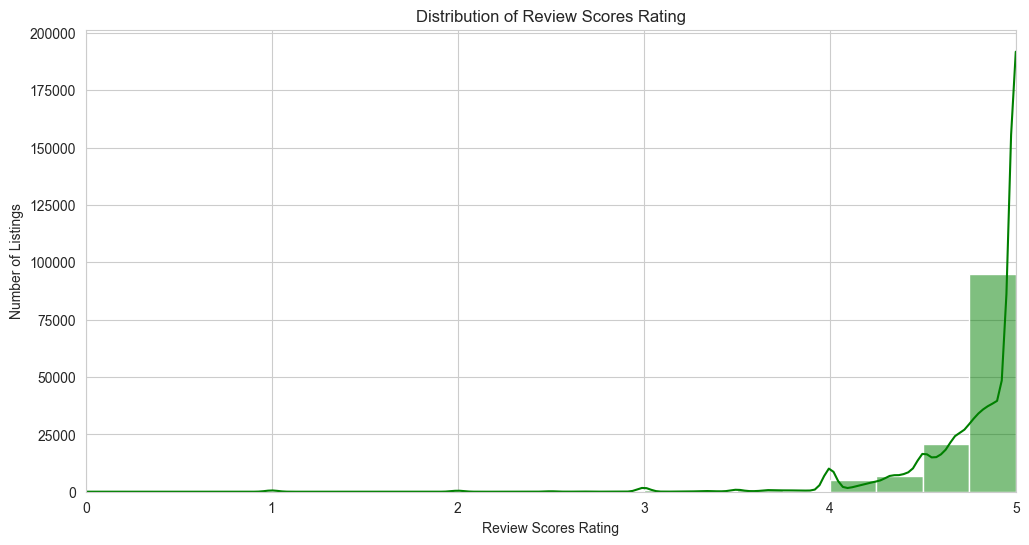

In [69]:
plt.figure(figsize=(12, 6))
sns.histplot(df['review_scores_rating'], bins=20, kde=True, color='green')
plt.title('Distribution of Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Number of Listings')
plt.xlim(0, 5)
plt.show()

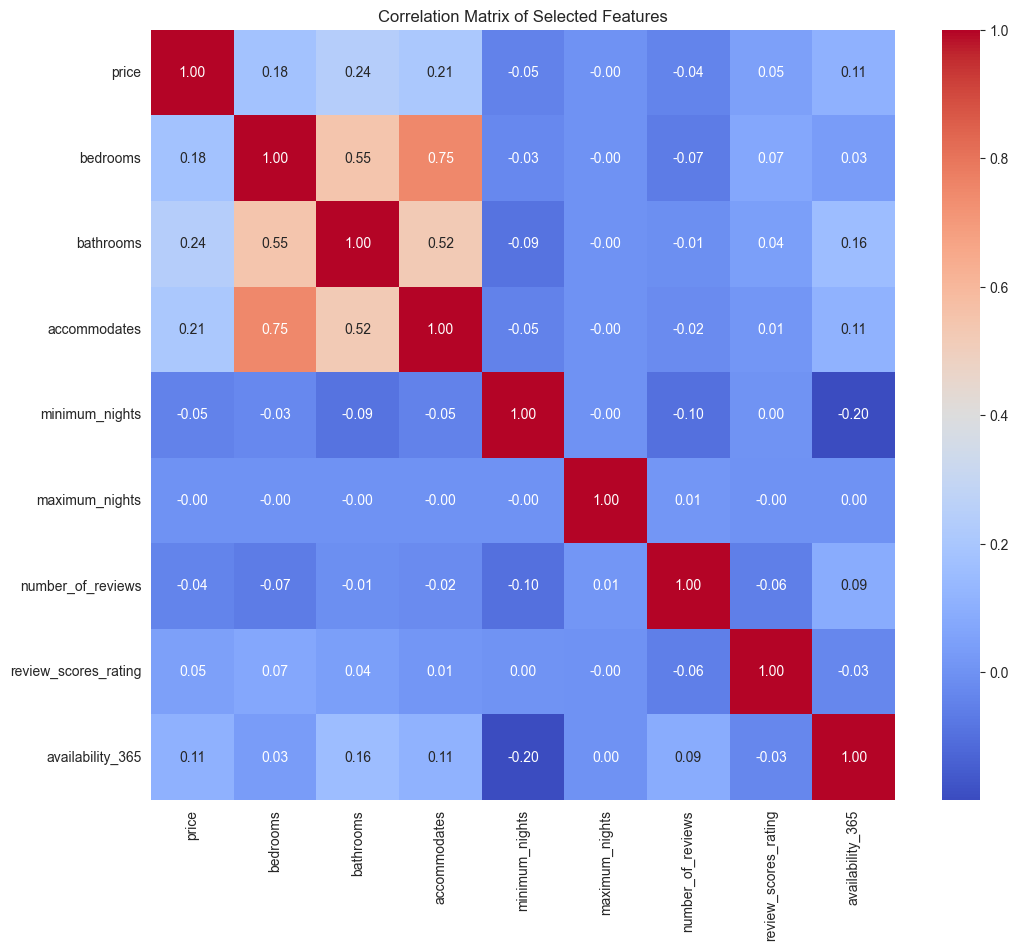

In [70]:
numerical_columns = [
    'price', 'bedrooms', 'bathrooms', 'accommodates',
    'minimum_nights', 'maximum_nights', 'number_of_reviews',
    'review_scores_rating', 'availability_365'
]

for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

corr_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()